<a href="https://colab.research.google.com/github/airelavmi/netology/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Загрузите файл HR.csv в pandas dataframe**

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('/content/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

**2. Рассчитайте основные статистики для переменных (среднее, медиана,мода, мин/макс, сред. отклонение)**

In [16]:
numeric_cols = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]
numeric_cols.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


In [17]:
mean = numeric_cols.mean()
median = numeric_cols.median()
mode = numeric_cols.mode().iloc[0]
min_ = numeric_cols.min()
max_ = numeric_cols.max()
std_ = numeric_cols.std()

In [18]:
categorical_cols = df[['Work_accident','left','promotion_last_5years','department','salary']]
categorical_cols.head()

,Work_accident,left,promotion_last_5years,department,salary
0,0,1,0,sales,low
1,0,1,0,sales,medium
2,0,1,0,sales,medium
3,0,1,0,sales,low
4,0,1,0,sales,low


In [19]:
mode_categorical = categorical_cols.mode().iloc[0]

print("Числовые переменные:")
print("\nСреднее:")
print(mean)
print("\nМедиана:")
print(median)
print("\nМода:")
print(mode)
print("\nМинимум:")
print(min_)
print("\nМаксимум:")
print(max_)
print("\nСтандартное отклонение:")
print(std_)
print("\nКатегориальные переменные:")
print("\nМода:")
print(mode_categorical)

Числовые переменные:

Среднее:
satisfaction_level        0.612834
last_evaluation           0.716102
number_project            3.803054
average_montly_hours    201.050337
time_spend_company        3.498233
dtype: float64

Медиана:
satisfaction_level        0.64
last_evaluation           0.72
number_project            4.00
average_montly_hours    200.00
time_spend_company        3.00
dtype: float64

Мода:
satisfaction_level        0.10
last_evaluation           0.55
number_project            4.00
average_montly_hours    135.00
time_spend_company        3.00
Name: 0, dtype: float64

Минимум:
satisfaction_level       0.09
last_evaluation          0.36
number_project           2.00
average_montly_hours    96.00
time_spend_company       2.00
dtype: float64

Максимум:
satisfaction_level        1.0
last_evaluation           1.0
number_project            7.0
average_montly_hours    310.0
time_spend_company       10.0
dtype: float64

Стандартное отклонение:
satisfaction_level       0.248631
las

**3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.**

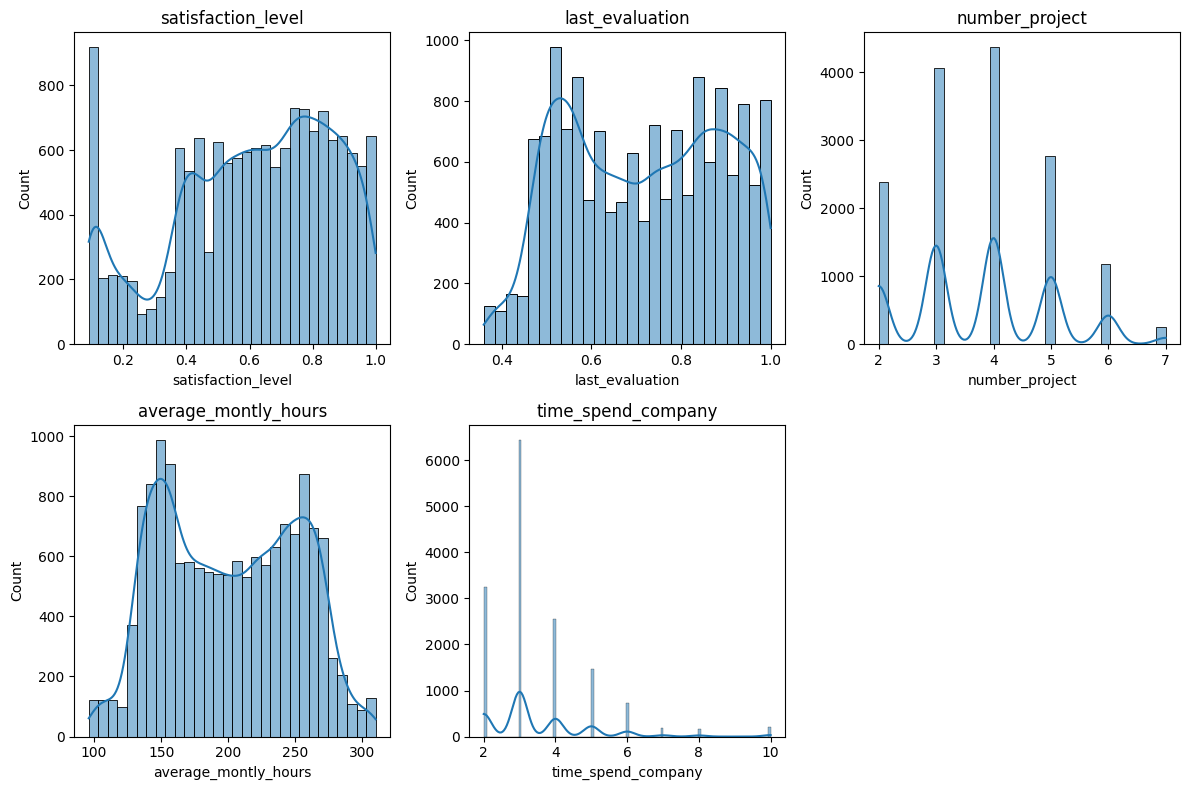

In [20]:
# Создаем гистограммы для каждой количественной переменной
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_cols.columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(numeric_cols[column], kde = True)
    plt.title(column)
plt.tight_layout()
plt.show()

Данные не соответствуют нормальному распределению,поэтому можно рассчитать корреляционную матрицу с использованием коэффициента корреляции Спирмена

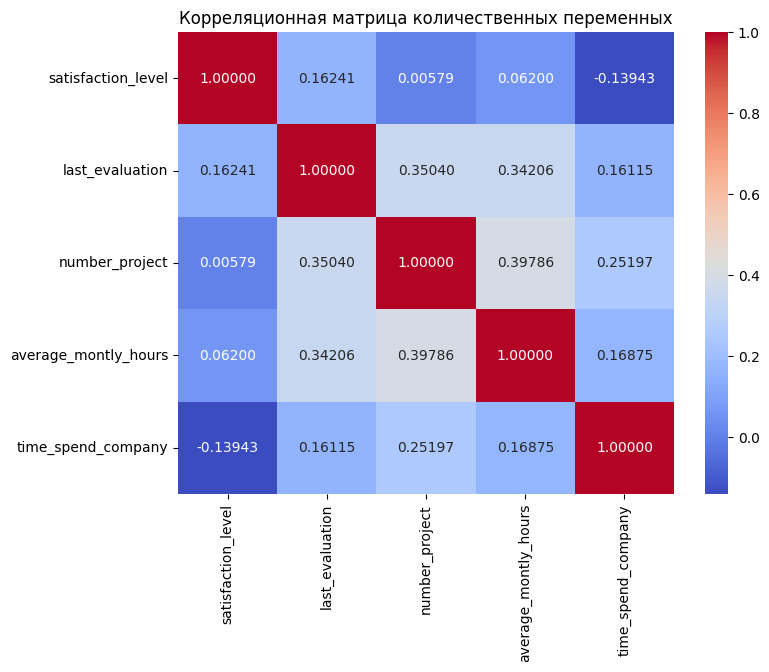

Две самые скоррелированные переменные:
number_project  average_montly_hours    0.397855
dtype: float64

Две наименее скоррелированные переменные:
satisfaction_level  number_project    0.005786
dtype: float64


In [21]:
correlation_matrix = numeric_cols.corr(method = 'spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".5f")
plt.title("Корреляционная матрица количественных переменных")
plt.show()

correlation_values = correlation_matrix.unstack().sort_values(key=lambda x: abs(x),ascending=False)

most_correlated = correlation_values[5:6]
least_correlated = correlation_values[-1:]

print("Две самые скоррелированные переменные:")
print(most_correlated)

print("\nДве наименее скоррелированные переменные:")
print(least_correlated)

**4. Рассчитайте сколько сотрудников работает в каждом
департаменте**

In [22]:
department_counts = df['department'].value_counts()
department_counts

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

**5. Показать распределение сотрудников по зарплатам**

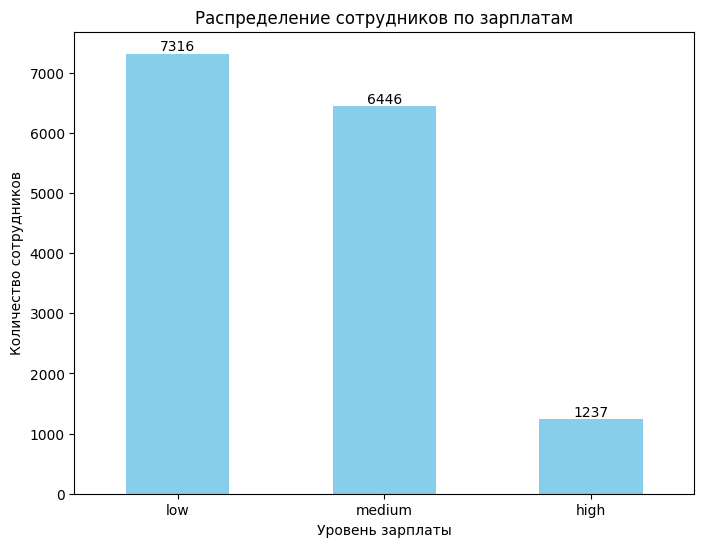

In [23]:
salary_distribution = df['salary'].value_counts()

plt.figure(figsize=(8, 6))
chart = salary_distribution.plot(kind='bar', color='skyblue')
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=0)

for i, v in enumerate(salary_distribution):
    chart.text(i, v, str(v), ha='center', va='bottom')

plt.show()


**6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности**

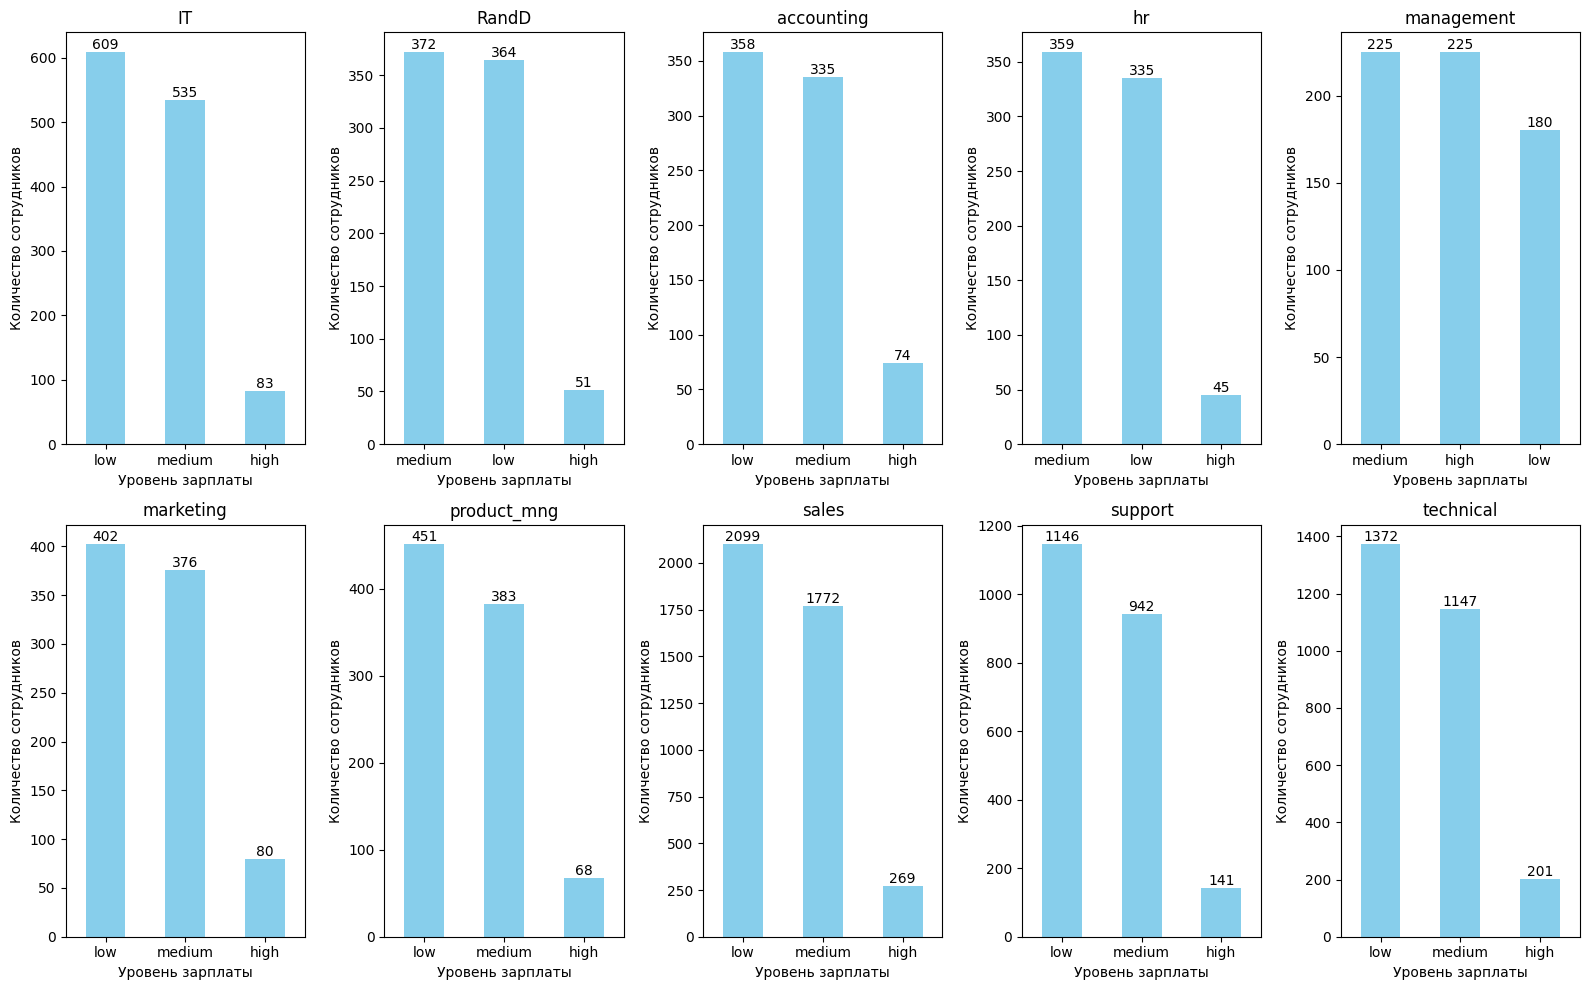

In [24]:
import matplotlib.pyplot as plt

# Группировка данных по департаментам
grouped = df.groupby('department')

rows = 2
cols = 5

plt.figure(figsize=(16, 10))

for i, (name, group) in enumerate(grouped):
    plt.subplot(rows, cols, i + 1)
    salary_distribution = group['salary'].value_counts()
    chart = salary_distribution.plot(kind='bar', color='skyblue')
    plt.title(name)
    plt.xlabel('Уровень зарплаты')
    plt.ylabel('Количество сотрудников')
    plt.xticks(rotation=0)
    for i, v in enumerate(salary_distribution):
        chart.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом**

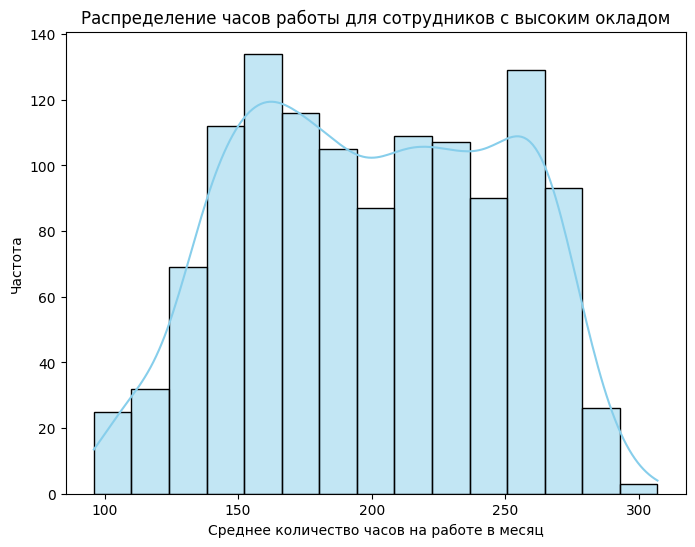

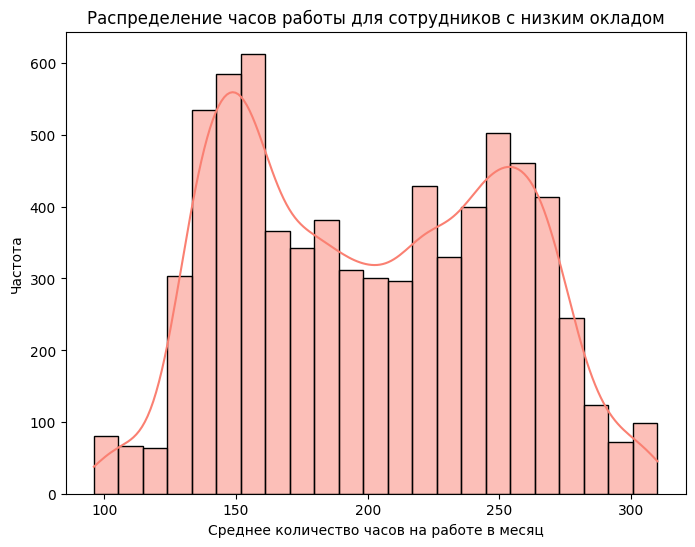

In [25]:
high = df[df['salary'] == 'high']['average_montly_hours']
low = df[df['salary'] == 'low']['average_montly_hours']

# Гистограмма для сотрудников с высоким окладом
plt.figure(figsize=(8, 6))
sns.histplot(high, kde=True, color='skyblue')
plt.title("Распределение часов работы для сотрудников с высоким окладом")
plt.xlabel("Среднее количество часов на работе в месяц")
plt.ylabel("Частота")
plt.show()

# Гистограмма для сотрудников с низким окладом
plt.figure(figsize=(8, 6))
sns.histplot(low, kde=True, color='salmon')
plt.title("Распределение часов работы для сотрудников с низким окладом")
plt.xlabel("Среднее количество часов на работе в месяц")
plt.ylabel("Частота")
plt.show()

По графику видно, что данные не имеют нормальное распределение

Чтобы убедиться можно провести тест Шапиро-Уилка

In [26]:
import scipy.stats as st

statistic, p_value = st.shapiro(low)
alpha = 0.05

print(f"Статистика теста: {statistic}")
print(f"P-значение: {p_value}")

if p_value < alpha:
    print("Данные не имеют нормальное распределение.")
else:
    print("Данные могут иметь нормальное распределение.")

Статистика теста: 0.9598619937896729
P-значение: 7.01181725578852e-41
Данные не имеют нормальное распределение.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Значит необходимо использовать непараметрические тесты

In [27]:
# Нулевая гипотеза (H0): Среднее количество часов на работе для сотрудников с высоким окладом равно среднему количеству часов на работе для сотрудников с низким окладом.
# Альтернативная гипотеза (H1): Среднее количество часов на работе для сотрудников с высоким окладом больше, чем среднее количество часов на работе для сотрудников с низким окладом.

statistic, p_value = st.mannwhitneyu(high, low, alternative='greater')

alpha = 0.05
print("Значение статистики Mann-Whitney U:", statistic)
print("P-значение:", p_value)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: Сотрудники с высоким окладом проводят на работе больше времени.")
else:
    print("Не отвергаем нулевую гипотезу: Нет статистически значимой разницы во времени на работе между сотрудниками с высоким и низким окладом.")


Значение статистики Mann-Whitney U: 4507096.5
P-значение: 0.5879383099013082
Не отвергаем нулевую гипотезу: Нет статистически значимой разницы во времени на работе между сотрудниками с высоким и низким окладом.


**8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):**

**● Доля сотрудников с повышением за последние 5 лет**

**● Средняя степень удовлетворенности**

**● Среднее количество проектов**

In [28]:
promotion = df.groupby('left')['promotion_last_5years'].sum() / df.groupby('left')['promotion_last_5years'].count()
satisfaction = df.groupby('left')['satisfaction_level'].mean()
number = df.groupby('left')['number_project'].mean()

print("Доля сотрудников с повышением за последние 5 лет:")
print(promotion)

print("\nСредняя степень удовлетворенности:")
print(satisfaction)

print("\nСреднее количество проектов:")
print(number)


Доля сотрудников с повышением за последние 5 лет:
left
0    0.026251
1    0.005321
Name: promotion_last_5years, dtype: float64

Средняя степень удовлетворенности:
left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

Среднее количество проектов:
left
0    3.786664
1    3.855503
Name: number_project, dtype: float64


**9. Разделить данные на тестовую и обучающую выборки**

**Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)**

**Оценить качество модели на тестовой выборки**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Х - признаки, y - целевая переменная left
X = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Точность модели:", accuracy)

Точность модели: 0.764


Точность модели LDA можно считать не плохой, но хорошей не назовешь.